In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
os.chdir('../../')
from src.dynamical_system.simulate_method import simulate_rk4
from src.dynamical_system.model import rossler
from src.bifurcation import local_maxima
from src.visualization.figure import report20241001

In [2]:
### figure
figure = report20241001({
        'font.family':'Times New Roman',
        'mathtext.fontset':'stix',
        'font.size':15,
        'xtick.direction':'in',
        'ytick.direction':'in',
        'axes.linewidth':1.5,
        'xtick.major.size':8,
        'ytick.major.size':8,
        }, 
        savefig=True, 
        save_dir='report/20241001/figure/',
        name='nonlinear_dynamical_theory', 
        file_type='png')

In [3]:
## Simulate bifurcation diagram
a, c = 0.2, 5.7
b_range = np.arange(0.55, 0.95, 0.001)
x_init, y_init, z_init = 0., 1., -1.
simulation_settings={'number of samples':None,
                     'start time':0.,
                     'ending time':1000.,
                     'time step size':0.1,}
warmup_step = 5000
t_list = []
X_list = []
y_list = []
b_list = []
for b in b_range:
    X, t = simulate_rk4(system_model=rossler, 
                        model_params=[a, b, c], 
                        initial_state=[x_init, y_init, z_init], 
                        simulation_settings=simulation_settings,)
    t_list.append(t[warmup_step:])
    X_list.append(X[warmup_step:])
    y_list.append(X[warmup_step:, 1])
    b_list.append(np.full(len(X[warmup_step:, 1]), b))

Simulation:   0%|          | 0/10000 [00:00<?, ?it/s]

In [4]:
### Get the local-maxima(lm)

y_lm_list, idx_lm_list, b_lm_list, y_lm_flat, idx_lm_flat, b_lm_flat = local_maxima(data_list=y_list,
                                                                                    parameter_list=b_list,
                                                                                    find_peaks_params={'prominence':1.0, 
                                                                                                        'height':None, 
                                                                                                        'distance':None, 
                                                                                                        'threshold':None},
                                                                                    return_flatten=True)

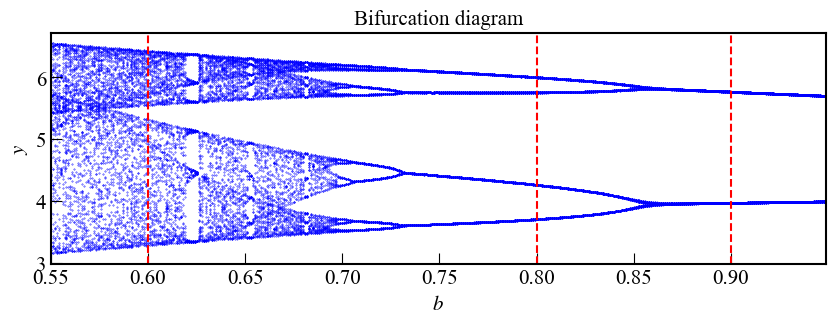

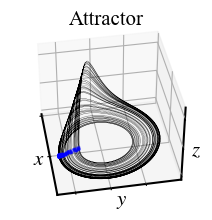

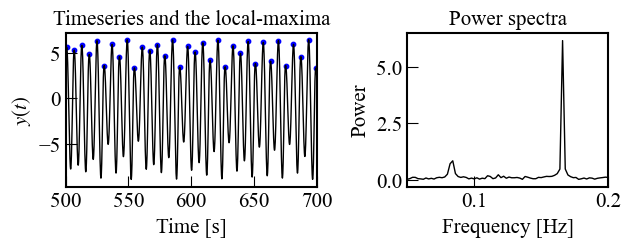

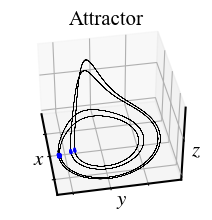

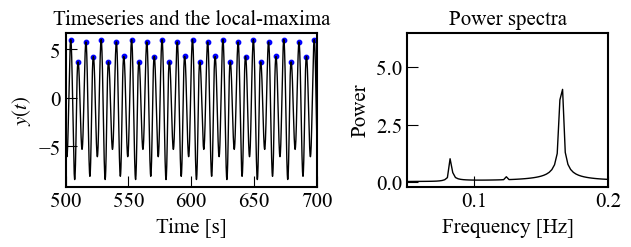

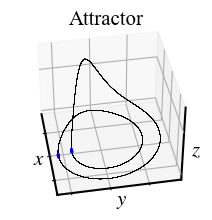

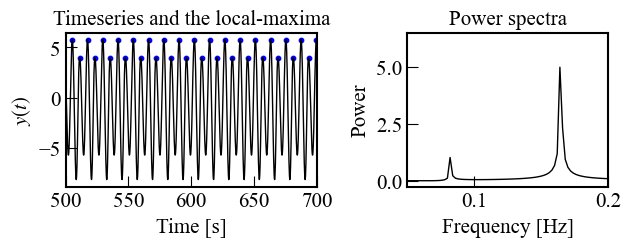

In [5]:
parameters = [0.6, 0.8, 0.9]

figure.bifurcation(b_lm_flat, y_lm_flat, idx_lm_list,
                   b_range, t_list, X_list, y_list,
                   parameters,
                   file_name='rossler')